In [1]:
import pandas as pd 
import os
import librosa as lr
import librosa.display
import IPython.display as ipd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scale_file ='cov1.wav'

In [3]:
ipd.Audio(scale_file)
lst_rmse=[]
lst_centroid=[]
lst_bandwidth=[]
lst_rolloff=[]
lst_zero=[]

ValueError: rate must be specified when data is a numpy array or list of audio samples.

In [ ]:
# load audio files with librosa
scale, sr = librosa.load(scale_file)

In [ ]:
#Extracting Short-Time Fourier Transform


In [ ]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [ ]:
S_scale = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [ ]:
S_scale.shape

In [ ]:
type(S_scale[0][0])

In [ ]:
#Calculating the spectrogram

In [ ]:
Y_scale = np.abs(S_scale) ** 2

In [6]:
Y_scale.shape

NameError: name 'Y_scale' is not defined

In [7]:
type(Y_scale[0][0])

NameError: name 'Y_scale' is not defined

In [8]:
#Visualizing the spectrogram

In [17]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

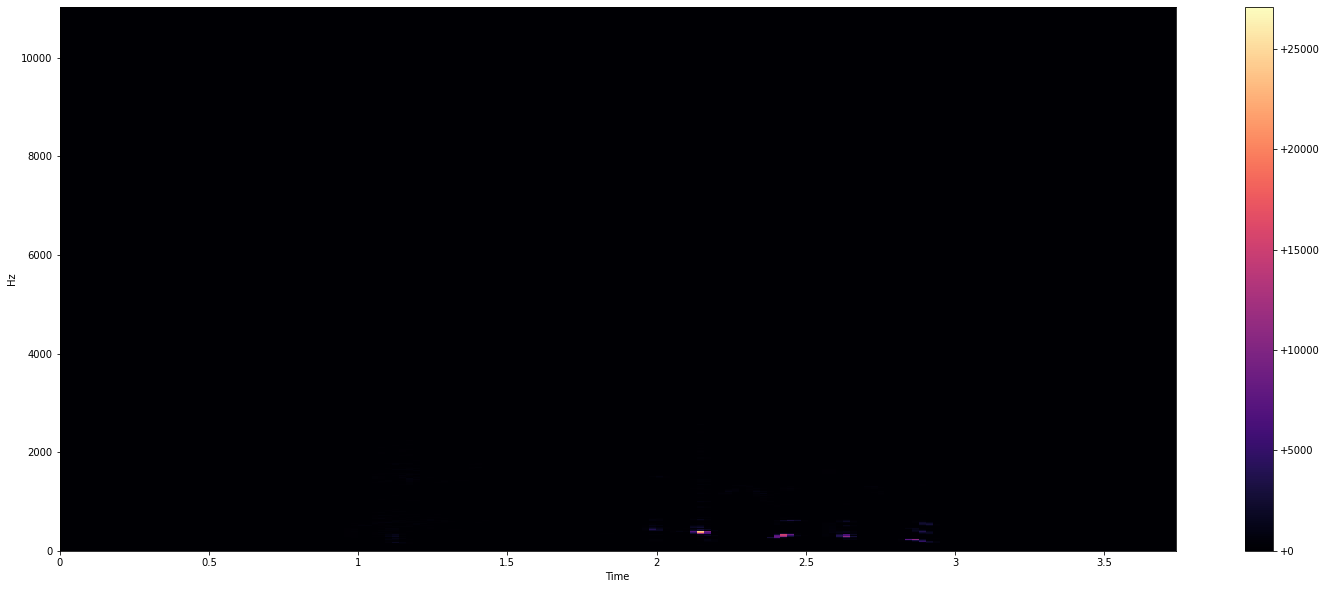

In [18]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

In [19]:
#Log-Amplitude Spectrogram

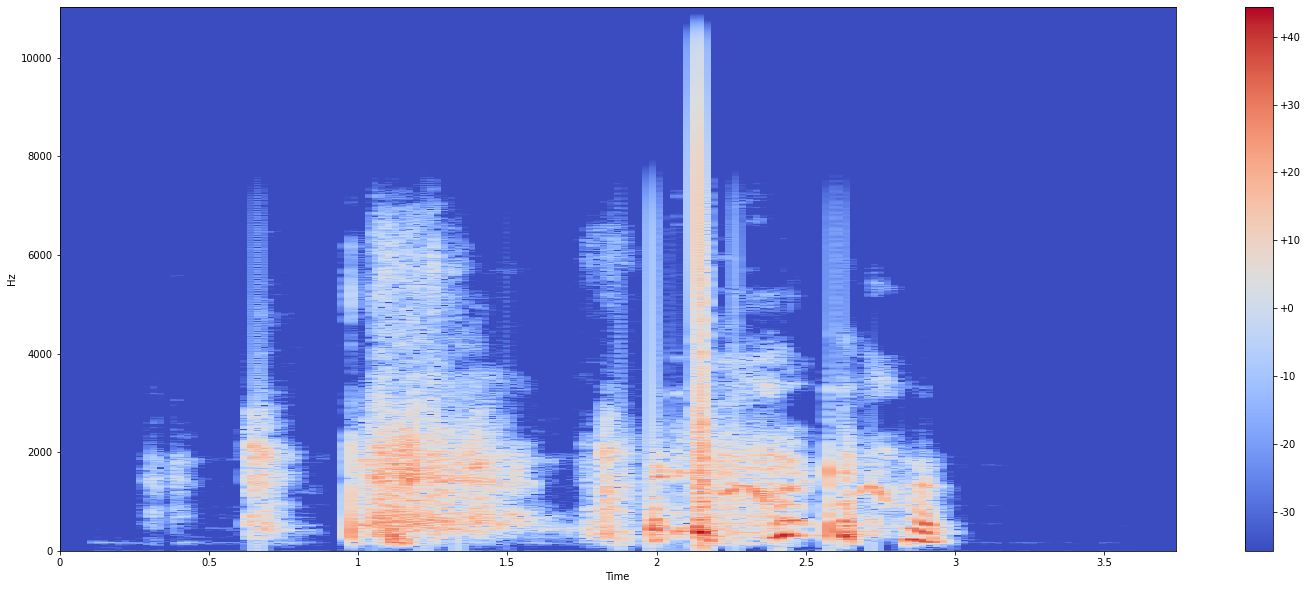

In [20]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

In [21]:
#Log-Frequency Spectrogram


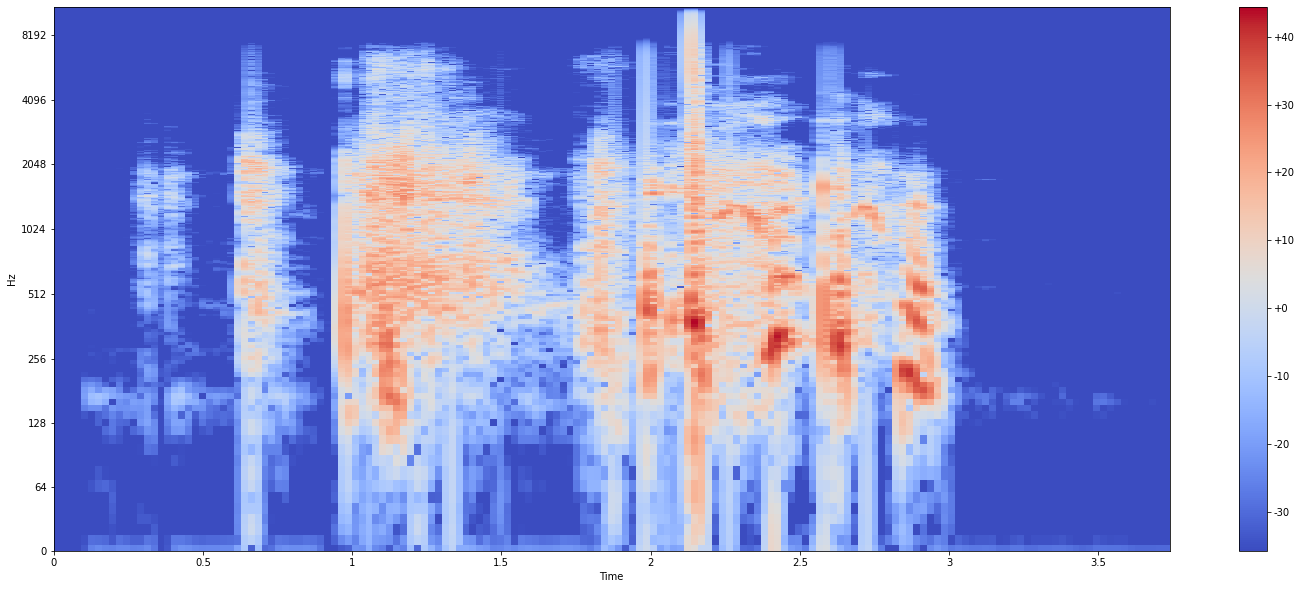

In [22]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

In [23]:
#comparaison between a person who has covid nd safe person

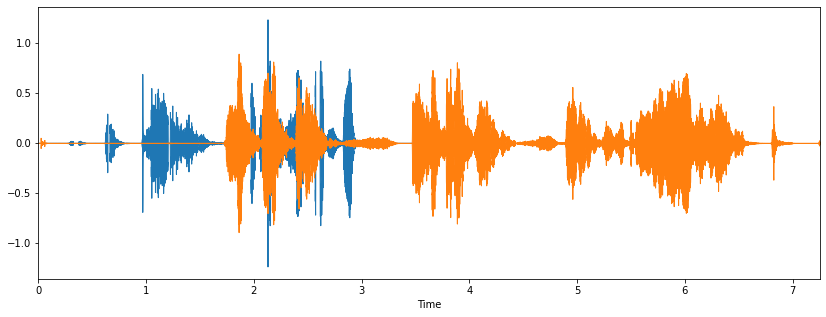

In [62]:
filename1='son_projet/cov1.wav'
filename2='son_projet/cov2.wav'
import librosa
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename1)
data1, sample_rate1 = librosa.load(filename2)
librosa.display.waveplot(data, sr=sample_rate)
librosa.display.waveplot(data1, sr=sample_rate1)
ipd.Audio(filename1)
ipd.Audio(filename2)

In [25]:
def FeatureSpectralCentroid(X2, f_s2):
    data_dir='./son_projet'
    audio_file=glob(data_dir + '/*.wav')
    X, f_s = lr.load(audio_file[2])

    isSpectrum = X.ndim == 1

    #X = X**2 

    norm = X.sum(axis=0, keepdims=True)
    norm[norm == 0] = 1

    vsc = np.dot(np.arange(0, X.shape[0]), X) / norm

    # convert from index to Hz
    vsc = (vsc / (X.shape[0] - 1)) * (f_s / 2)

    # if input is a spectrum, output scaler else if spectrogram, output 1d array
    vsc = np.squeeze(vsc) if isSpectrum else np.squeeze(vsc, axis=0)

    return vsc

In [26]:
FeatureSpectralCentroid(1,1)

array(3429.6509605)

In [27]:
def FeatureSpectralCentroid(X2, f_s2):
    data_dir='./son_projet'
    audio_file=glob(data_dir + '/*.wav')
    X, f_s = lr.load(audio_file[1])

    isSpectrum = X.ndim == 1

    # X = X**2 removed for consistency with book

    norm = X.sum(axis=0, keepdims=True)
    norm[norm == 0] = 1

    vsc = np.dot(np.arange(0, X.shape[0]), X) / norm

    # convert from index to Hz
    vsc = (vsc / (X.shape[0] - 1) * f_s) / 2

    # if input is a spectrum, output scaler else if spectrogram, output 1d array
    vsc = np.squeeze(vsc) if isSpectrum else np.squeeze(vsc, axis=0)

    return vsc

In [28]:
# spectral centroid with librossa

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import IPython.display as ipd 

In [30]:
ipd.Audio(filename1)

In [31]:
# load audio files with librosa
filename1, sr = librosa.load(filename1)

In [1]:
def centroid(filename1):
    data, sample_rate = librosa.load(filename1)
    FRAME_SIZE = 1024
    HOP_LENGTH = 512
    sc_filename1 = librosa.feature.spectral_centroid(y=data, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
    lst_centroid.append(sc_filename1.mean())

In [2]:
#sc_filename1.shape
len(sc_filename1)
sc_filename1.mean()

NameError: name 'sc_filename1' is not defined

In [ ]:
#Visualising spectral centroid

In [ ]:
frames = range(len(sc_filename1))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

In [ ]:
len(t)

In [34]:
plt.figure(figsize=(25,10))

plt.plot(t, sc_filename1, color='c')

plt.show()

NameError: name 't' is not defined

<Figure size 1800x720 with 0 Axes>

In [ ]:
#Spectral bandwidth with Librosa

In [69]:
def bandwidth(filename1):
    data, sample_rate = librosa.load(filename1)
    ban_filename1 = librosa.feature.spectral_bandwidth(y=data, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
    lst_bandwidth.append(ban_filename1.mean())

In [70]:
print(data)
bandwidth(filename1)
print(lst_bandwidth)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.4890616e-05
  2.7237539e-07 -2.5290572e-07]
[1418.5999316294915]


In [ ]:
ban_filename1.shape
ban_filename1.mean()

In [36]:
#Visualising spectral bandwidth

In [37]:
plt.figure(figsize=(25,10))

plt.plot(t, ban_filename1, color='b')
plt.show()

NameError: name 't' is not defined

<Figure size 1800x720 with 0 Axes>

In [ ]:
#Spectral rollof

In [79]:
def rollofff(filename1):
    data, sample_rate = librosa.load(filename1)
    Roll_filename1=librosa.feature.spectral_rolloff(y=data, sr=sr,roll_percent=0.85)
    Roll_filename1_min = librosa.feature.spectral_rolloff(y=data, sr=sr, roll_percent=0.01)
    frames_Roll = range(len(Roll_filename1))
    tRoll = librosa.frames_to_time(frames_Roll, hop_length=HOP_SIZE)
    lst_rolloff.append(Roll_filename1.mean())
    

In [40]:
def Rollof():
    fig, ax = plt.subplots()
    #librosa.display.specshow(librosa.amplitude_to_db(filename1, ref=np.max),y_axis='log', x_axis='time',ax=ax)
    ax.plot(librosa.times_like(Roll_filename1), Roll_filename1[0], label='Roll-off frequency (0.99)')
    ax.plot(librosa.times_like(Roll_filename1), Roll_filename1_min[0], color='w',label='Roll-off frequency (0.01)')
    ax.legend(loc='lower right')
    ax.set(title='log Power spectrogram')
    plt.show()

NameError: name 'Roll_filename1' is not defined

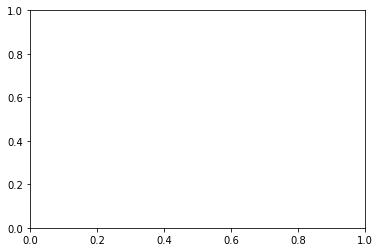

In [41]:
Rollof()

In [42]:
print(Roll_filename1.mean())
print(Roll_filename1_min.mean())

NameError: name 'Roll_filename1' is not defined

In [82]:
def rms_don(filename1):
    y, sr = librosa.load(filename1)
    rms = librosa.feature.rms(y=y)
    lst_rmse.append(rms.mean())

In [44]:
def RMSE():
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.semilogy(rms.T, label='RMS Energy') 
    plt.xticks([])
    plt.xlim([0, rms.shape[-1]])
    plt.legend(loc='best')
    plt.subplot(2, 1, 2)
    #librosa.display.specshow(librosa.amplitude_to_db(y, ref=np.max),y_axis='log', x_axis='time')
    plt.title('log Power spectrogram')
    plt.tight_layout()

NameError: name 'rms' is not defined

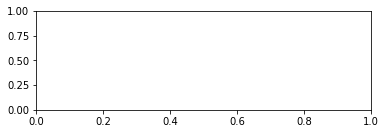

In [45]:
RMSE()

In [46]:
print(rms.mean())

NameError: name 'rms' is not defined

In [85]:
def zero_crossing(filename1):
    y, sr = librosa.load(filename1)
    crossing=librosa.feature.zero_crossing_rate(y)
    lst_zero.append(y.mean())

In [86]:
def recup_data(filename1):
    bandwidth(filename1)
    rollofff(filename1)
    rms_don(filename1)
    zero_crossing(filename1)
    centroid(filename1)
    print(lst_rmse)
    #df.assign(spectral_centroid=lst_centroid)
    #df.assign(spectral_bandwidth=lst_bandwidth)
    #df.assign(rolloff=lst_rolloff)
    #df.assign(zero_crossing_rate=lst_zero)
    #return df


In [87]:
recup_data(filename1)


[0.059003852, 0.059003852]
